In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basics of Frequency Domain Filtering

(-0.5, 1023.5, 1023.5, -0.5)

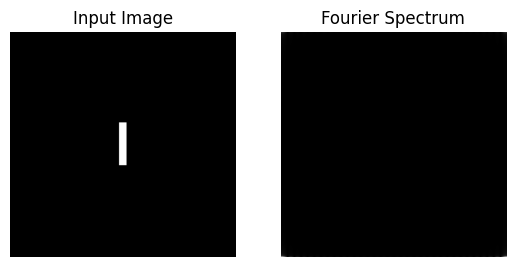

In [2]:
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt

# Read image file
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/Fig0424(a)(rectangle).tif',cv2.IMREAD_GRAYSCALE)

# Compute Fourier Spectrum
fourier_transform = n.fft2(image)
fourier_spectrum = np.abs(fourier_transform)

plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(fourier_spectrum, cmap = 'gray')
plt.title('Fourier Spectrum')
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

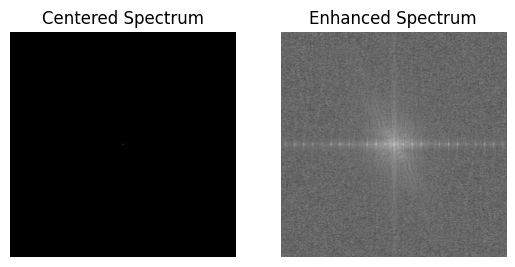

In [3]:
# Centred Spectrum
centered_spectrum = n.fftshift(fourier_transform)

# Enhancing centred spectrum by log transform
enhanced_spectrum = np.log10(1 + np.abs(centered_spectrum))

plt.subplot(121)
plt.imshow(np.abs(centered_spectrum), cmap = 'gray')
plt.title('Centered Spectrum')
plt.axis('off')

plt.subplot(122)
plt.imshow(enhanced_spectrum, cmap = 'gray')
plt.title('Enhanced Spectrum')
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

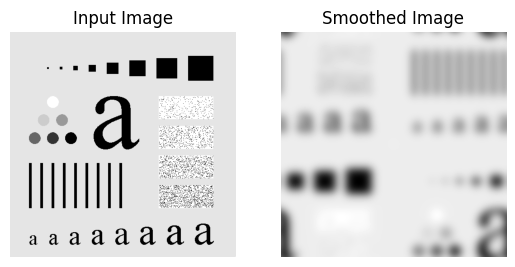

In [7]:
# Filtering in frequency domain with low-pass filters

import numpy as np
import numpy.fft as n
import cv2
import matplotlib.pyplot as plt

def lpfilter(type, M, N, D0, n = None):
    # Convert type to lowercase
    type = type.lower()

    # Use numpy meshgrid to create U and V arrays
    U, V = np.meshgrid(np.arange(N), np.arange(M))

    # Compute the distances D(U, V)
    D = np.hypot(U - M/2, V - N/2)

    # Begin filter computations
    if type == 'ideal':
        H = np.double(D <= D0)
    elif type == 'butterworth':
        if n is None:
            n = 1
        H = 1 / (1 + (D / D0)**(2 * n))
    elif type == 'gaussian':
        H = np.exp(-(D**2) / (2 * (D0**2)))
    else:
        raise ValueError('Unknown filter type.')

    return H

# Load the test image
f = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Image Processing/Fig0333(a)(test_pattern_blurring_orig).tif',cv2.IMREAD_GRAYSCALE)

# Get image size
M, N = f.shape

# Define cutoff frequency and filter type
D0 = 10
filter_type = 'gaussian'

# Compute the ideal low-pass filter
ILPF = lpfilter(filter_type, M, N, D0)

# Apply the filter to the image
filtered_image = n.ifftshift(n.ifft2(n.fft2(f) * n.fft2(ILPF)))

plt.subplot(121)
plt.imshow(f, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.abs(filtered_image), cmap = 'gray')
plt.title('Smoothed Image')
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

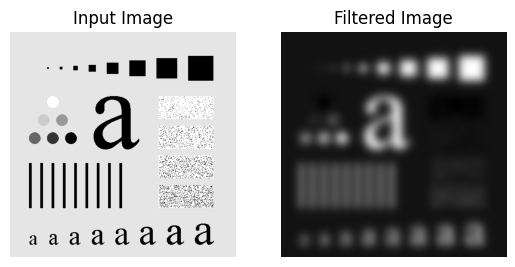

In [8]:
# High pass filtering

# Define cutoff frequency and filter type
D0 = 10
filter_type = 'ideal'

# Compute the ideal high-pass filter
IHPF = 1 - ILPF

# Apply the filter to the image
filtered_image = n.ifftshift(n.ifft2(n.fft2(f) * n.fft2(IHPF)))

plt.subplot(121)
plt.imshow(f, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.abs(filtered_image), cmap = 'gray')
plt.title('Filtered Image')
plt.axis('off')